<a href="https://colab.research.google.com/github/amnnsharma/GlidePro/blob/main/Dynacard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.interpolate import interp1d

def fit_curve(x_data, y_data, kind='cubic'):
    interpolated_function = interp1d(x_data, y_data, kind=kind, fill_value="extrapolate")
    return interpolated_function

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
# Path to your Excel file in Google Drive
file_path = '/content/drive/My Drive/deviation_data.xlsx'

# Load Excel file into a DataFrame
old_df = pd.read_excel(file_path)

# Display the loaded DataFrame
old_df.columns=['SN', 'MD', 'Inclination', 'Azimuth']
old_df=old_df.drop(columns=['SN'])

i=min(old_df['MD'].astype(float).tolist())
j=max(old_df['MD'].astype(float).tolist())

#TOTAL STEPS
steps=100

df=pd.DataFrame({'MD': np.linspace(i, j, steps)})  #Taken 100 steps, delta_s is max(MS)/100
df['Inclination'] = np.interp(df['MD'], old_df['MD'].astype(float).tolist(), old_df['Inclination'].astype(float).tolist())
df['Azimuth'] = np.interp(df['MD'], old_df['MD'].astype(float).tolist(), old_df['Azimuth'].astype(float).tolist())


md=df['MD'].astype(float).tolist()
inclination=df['Inclination'].astype(float).tolist()
azimuth=df['Azimuth'].astype(float).tolist()

ds=max(md)/steps

In [ ]:
import math

T_s=[]

for i in range(len(md)):
  T_s.append(np.array([math.sin(math.radians(inclination[i]))*math.cos(math.radians(azimuth[i])),
                       math.sin(math.radians(inclination[i]))*math.sin(math.radians(azimuth[i])),
                       math.cos(math.radians(inclination[i]))]))


In [ ]:
gamma=[]
rc=[]
B_s=[]

for i in range(len(md)-1):
  if T_s[i+1][0]!=T_s[i][0] and T_s[i+1][1]!=T_s[i][1] and T_s[i+1][2]!=T_s[i][2]:
    gamma_i=math.acos(np.dot(T_s[i], T_s[i+1]))
    gamma.append(gamma_i)
    rc.append((md[i+1]-md[i])/gamma_i)
  else:
    gamma.append(0)
    rc.append(np.inf)

  B_s.append(np.cross(T_s[i], T_s[i+1]))


N_s=[]

for i in range(len(md)-1):
  if T_s[i][1]==0:
    N_s.append(np.array([0, 1, 0]))
  else:
    f=(1+(T_s[i][0]/T_s[i][1])**2)**0.5
    N_s.append(np.array([1/f, -T_s[i][0]/T_s[i][1]/f, 0]))

g=np.array([0, 0, -9.81])

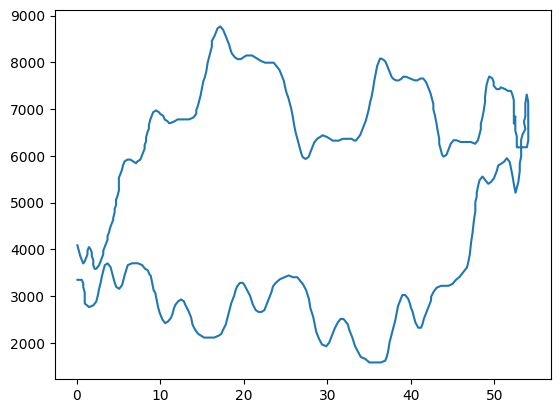

In [ ]:
import scipy.io

# Load .mat file
mat_data = scipy.io.loadmat('/content/drive/My Drive/dyna_data.mat')

for key, value in mat_data.items():
    #print(type(key))
    if isinstance(value, np.ndarray):
      if key=='F':
        F=list(np.ravel(value))
      if key=='X':
        u=list(np.ravel(value))
      #print(key)
      #print(value)
      #dyna_readings[value]=key


import matplotlib.pyplot as plt
plt.plot(u,F)

In [ ]:
def get_derivatives(F, u):
    data_points=len(F)
    F=np.append(F, F[:2])
    u=np.append(u, u[:2])

    df_dt=[]
    d2f_dt2=[]
    du_dt=[]
    d2u_dt2=[]

    dt=30/data_points #getting this data in 30 seconds i.e. 2 SPM

    for i in range(data_points+1):
      df_dt.append((F[i+1]-F[i])/dt)

    for i in range(data_points):
      d2f_dt2.append((df_dt[i+1]-df_dt[i])/dt)

    df_dt=df_dt[:-1]

    for i in range(data_points+1):
      du_dt.append((u[i+1]-u[i])/dt)


    for i in range(data_points):
      d2u_dt2.append((du_dt[i+1]-du_dt[i])/dt)

    du_dt=du_dt[:-1]

    return du_dt, d2u_dt2, df_dt, d2f_dt2

In [ ]:
du_dt, d2u_dt2, df_dt, d2f_dt2= get_derivatives(u, F)

In [ ]:
np.array(u).shape

(456,)

In [ ]:
ds*g@T_s[1]*np.ones(len(du_dt))

array([-164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, -164.3175, -164.3175,
       -164.3175, -164.3175, -164.3175, -164.3175, 

In [ ]:
from itertools import chain

step_recorder=[[u, F,  du_dt, d2u_dt2, df_dt, d2f_dt2]]

fr=[]

for i in range(steps-1):
    if i==0:
      u=u[:456]+ ds**2/25*(d2u_dt2- g@T_s[i]*np.ones(len(du_dt)) -1/1000*(du_dt -np.ones(len(du_dt)))+
                           1/10*(list(map(lambda x: (g@B_s[i])**2 * x, du_dt))+
                            (g@N_s[i]*np.ones(len(du_dt)) + list(map(lambda x: 2*x, F)))**2)**0.5)

      F=F[:456]- ds*1*(d2u_dt2- g@T_s[i]*np.ones(len(du_dt))+
                    1/10*(list(map(lambda x: (g@B_s[i])**2 * x, du_dt))+
                            (g@N_s[i]*np.ones(len(du_dt)) + list(map(lambda x: 2*x, F)))**2)**0.5+
                          -1/1000*(du_dt -np.ones(len(du_dt))))
      fr.append([1.0*((list(map(lambda x: (g@B_s[i])**2 * x, du_dt))+
                            (g@N_s[i]*np.ones(len(du_dt)) + list(map(lambda x: 2*x, F)))**2)**0.5)])
    else:

      u=2*u[:456]-step_recorder[i-1][0][:456]+ ds**2/25*(d2u_dt2- g@T_s[i]*np.ones(len(du_dt))
      -1/1000*(du_dt -np.ones(len(du_dt)))+
                           1/10*(list(map(lambda x: (g@B_s[i])**2 * x, du_dt))+
                            (g@N_s[i]*np.ones(len(du_dt)) + list(map(lambda x: 2*x, F)))**2)**0.5)

      F=F[:456] -ds*1*(d2u_dt2- g@T_s[i]*np.ones(len(du_dt))+
                    1/10*(list(map(lambda x: (g@B_s[i])**2 * x, du_dt))+
                            (g@N_s[i]*np.ones(len(du_dt)) + list(map(lambda x: 2*x, F)))**2)**0.5+
                          -1/1000*(du_dt -np.ones(len(du_dt))))

    #print(np.array(u).shape)
    #print(u)
    du_dt, d2u_dt2, _, _ = get_derivatives(u, F)
    step_recorder.append([u, F,  du_dt, d2u_dt2, df_dt, d2f_dt2])


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

In [ ]:
np.array(step_recorder).shape

(100, 6, 456)

In [ ]:
fr_distribution=[]
fr=list(fr)

for i in fr:
  fr_distribution.append(max(i))


#plt.plot(fr_distribution, md)
fr_distribution
fr

[[array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan,

In [ ]:
from scipy.interpolate import interp1d

def fit_curve(x_data, y_data, kind='cubic'):
    interpolated_function = interp1d(x_data, y_data, kind=kind, fill_value="extrapolate")
    return interpolated_function
import pandas as pd


import numpy as np
# Path to your Excel file in Google Drive
file_path = 'deviation_data.xlsx'

# Load Excel file into a DataFrame
old_df = pd.read_excel(file_path)

# Display the loaded DataFrame
old_df.columns=['SN', 'MD', 'Inclination', 'Azimuth']
old_df=old_df.drop(columns=['SN'])

i=min(old_df['MD'].astype(float).tolist())
j=max(old_df['MD'].astype(float).tolist())

#TOTAL STEPS
steps=100

df=pd.DataFrame({'MD': np.linspace(i, j, steps)})  #Taken 100 steps, delta_s is max(MS)/100
df['Inclination'] = np.interp(df['MD'], old_df['MD'].astype(float).tolist(), old_df['Inclination'].astype(float).tolist())
df['Azimuth'] = np.interp(df['MD'], old_df['MD'].astype(float).tolist(), old_df['Azimuth'].astype(float).tolist())


md=df['MD'].astype(float).tolist()
inclination=df['Inclination'].astype(float).tolist()
azimuth=df['Azimuth'].astype(float).tolist()

ds=max(md)/steps
import math

T_s=[]

for i in range(len(md)):
  T_s.append(np.array([math.sin(math.radians(inclination[i]))*math.cos(math.radians(azimuth[i])),
                       math.sin(math.radians(inclination[i]))*math.sin(math.radians(azimuth[i])),
                       math.cos(math.radians(inclination[i]))]))

gamma=[]
rc=[]
B_s=[]

for i in range(len(md)-1):
  if T_s[i+1][0]!=T_s[i][0] and T_s[i+1][1]!=T_s[i][1] and T_s[i+1][2]!=T_s[i][2]:
    gamma_i=math.acos(np.dot(T_s[i], T_s[i+1]))
    gamma.append(gamma_i)
    rc.append((md[i+1]-md[i])/gamma_i)
  else:
    gamma.append(0)
    rc.append(np.inf)

  B_s.append(np.cross(T_s[i], T_s[i+1]))


N_s=[]

for i in range(len(md)-1):
  if T_s[i][1]==0:
    N_s.append(np.array([0, 1, 0]))
  else:
    f=(1+(T_s[i][0]/T_s[i][1])**2)**0.5
    N_s.append(np.array([1/f, -T_s[i][0]/T_s[i][1]/f, 0]))

g=np.array([0, 0, -9.81])

#Dyna Data from excel
dyna_df=pd.read_excel('dyna_data.xlsx')
dyna_df.columns=['F','u']
F=dyna_df['F'].to_list()
u=dyna_df['u'].to_list()

import matplotlib.pyplot as plt
plt.plot(u,F)
def get_derivatives(F, u):
    data_points=len(F)
    F=np.append(F, F[:2])
    u=np.append(u, u[:2])

    df_dt=[]
    d2f_dt2=[]
    du_dt=[]
    d2u_dt2=[]

    dt=30/data_points #getting this data in 30 seconds i.e. 2 SPM

    for i in range(data_points+1):
      df_dt.append((F[i+1]-F[i])/dt)

    for i in range(data_points):
      d2f_dt2.append((df_dt[i+1]-df_dt[i])/dt)

    df_dt=df_dt[:-1]

    for i in range(data_points+1):
      du_dt.append((u[i+1]-u[i])/dt)


    for i in range(data_points):
      d2u_dt2.append((du_dt[i+1]-du_dt[i])/dt)

    du_dt=du_dt[:-1]

    return du_dt, d2u_dt2, df_dt, d2f_dt2
du_dt, d2u_dt2, df_dt, d2f_dt2= get_derivatives(u, F)

from itertools import chain

step_recorder=[[u, F,  du_dt, d2u_dt2, df_dt, d2f_dt2]]

fr=[]

for i in range(steps-1):
    if i==0:
      u=u[:456]+ ds**2/25*(d2u_dt2- g@T_s[i]*np.ones(len(du_dt)) -1/1000*(du_dt -np.ones(len(du_dt)))+
                           1/10*(list(map(lambda x: (g@B_s[i])**2 * x, du_dt))+
                            (g@N_s[i]*np.ones(len(du_dt)) + list(map(lambda x: 2*x, F)))**2)**0.5)

      F=F[:456]- ds*1*(d2u_dt2- g@T_s[i]*np.ones(len(du_dt))+
                    1/10*(list(map(lambda x: (g@B_s[i])**2 * x, du_dt))+
                            (g@N_s[i]*np.ones(len(du_dt)) + list(map(lambda x: 2*x, F)))**2)**0.5+
                          -1/1000*(du_dt -np.ones(len(du_dt))))
      fr.append([1.0*((list(map(lambda x: (g@B_s[i])**2 * x, du_dt))+
                            (g@N_s[i]*np.ones(len(du_dt)) + list(map(lambda x: 2*x, F)))**2)**0.5)])
    else:

      u=2*u[:456]-step_recorder[i-1][0][:456]+ ds**2/25*(d2u_dt2- g@T_s[i]*np.ones(len(du_dt))
      -1/1000*(du_dt -np.ones(len(du_dt)))+
                           1/10*(list(map(lambda x: (g@B_s[i])**2 * x, du_dt))+
                            (g@N_s[i]*np.ones(len(du_dt)) + list(map(lambda x: 2*x, F)))**2)**0.5)

      F=F[:456] -ds*1*(d2u_dt2- g@T_s[i]*np.ones(len(du_dt))+
                    1/10*(list(map(lambda x: (g@B_s[i])**2 * x, du_dt))+
                            (g@N_s[i]*np.ones(len(du_dt)) + list(map(lambda x: 2*x, F)))**2)**0.5+
                          -1/1000*(du_dt -np.ones(len(du_dt))))

      fr.append([1.0*((list(map(lambda x: (g@B_s[i])**2 * x, du_dt))+
                            (g@N_s[i]*np.ones(len(du_dt)) + list(map(lambda x: 2*x, F)))**2)**0.5)])
    #print(np.array(u).shape)
    #print(u)
    du_dt, d2u_dt2, _, _ = get_derivatives(u, F)
    step_recorder.append([u, F,  du_dt, d2u_dt2, df_dt, d2f_dt2])


fr_distribution=[]
fr=list(fr)

for i in fr:
  fr_distribution.append(max(i))


plt.plot(fr_distribution)
plt.show()


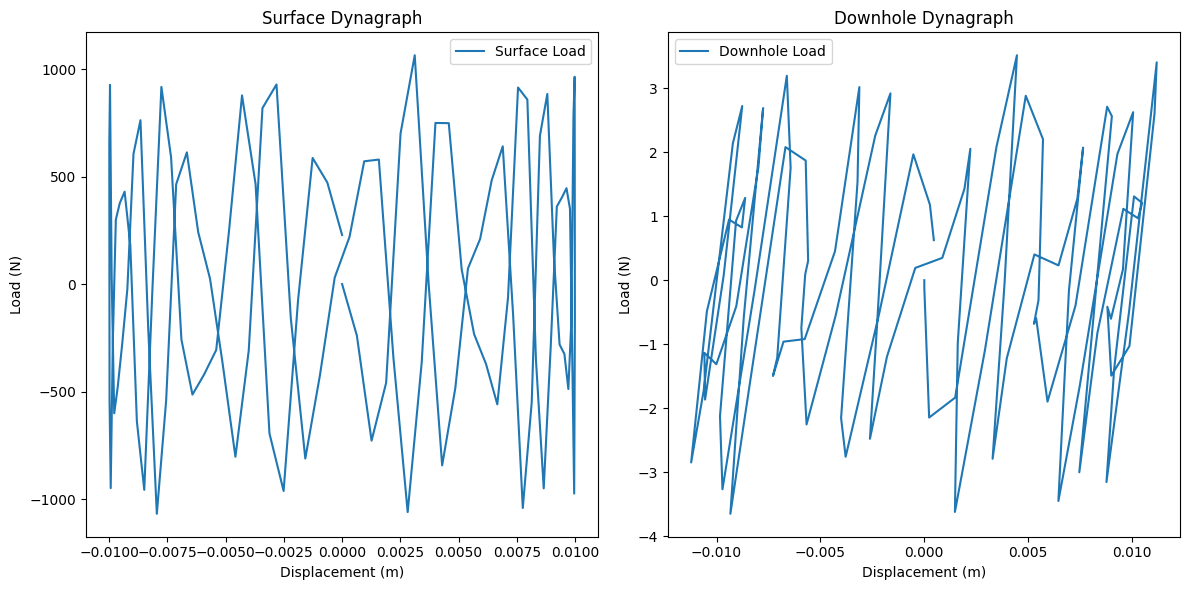

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
L = 500  # length of sucker rod (m)
rho = 7850  # density (kg/m^3)
E = 2.1e11  # Young's modulus (Pa)
A = 0.002  # cross-sectional area (m^2)
c = np.sqrt(E / rho)  # wave speed
damping_coefficient = 0.05  # damping coefficient (arbitrary units)

# Time parameters
T = 10  # total time (s)
dt = 0.1  # time step (s)
N_t = int(T / dt)  # number of time steps

# Spatial parameters
N_x = 200  # number of spatial steps
dx = L / N_x  # spatial step size
x = np.linspace(0, L, N_x)  # spatial domain

# Initial conditions
t_initial=np.linspace(0, T, N_t)
u = np.zeros(N_x)  # initial displacement
v = np.zeros(N_x)  # initial velocity

# Boundary conditions
def polished_rod_displacement(t):
    #dict={1:0.001,2:0.017, 3:0.079, 4:0.181, 5:0.308, 6:0.442, 7:0.571, 8:0.687,
    #       9:0.931, 10: 0.975 }
    A_p = 0.01  # amplitude (m)
    omega = 2 * np.pi / T  # angular frequency
    return A_p * np.sin(omega * t)

# Finite difference method for time integration
def finite_difference(t, y):
    u = y[:N_x]
    v = y[N_x:]
    dudt = v
    dvdt = np.zeros(N_x)

    # Interior points
    dvdt[1:-1] = c**2 * (u[2:] - 2*u[1:-1] + u[:-2]) / dx**2 - damping_coefficient * v[1:-1]

    # Boundary points
    dvdt[0] = (polished_rod_displacement(t) - u[0]) / dt**2 #- damping_coefficient * v[0]
    dvdt[-1] =c**2 * (u[-2] - u[-1]) / dx**2 - damping_coefficient * v[-1]

    return np.concatenate([dudt, dvdt])

# Solve the PDE using scipy's solve_ivp
y0 = np.concatenate([u, v])
sol = solve_ivp(finite_difference, [0, T], y0, t_eval=np.linspace(0, T, N_t), method="DOP853")

# Extract displacement and velocity
u_sol = sol.y[:N_x, :]
v_sol = sol.y[N_x:, :]

# Calculate loads
def calculate_loads(displacement):
    # Load is proportional to strain
    strain = np.gradient(displacement, dx, edge_order=2)
    load = E * A * strain
    return load

# Calculate loads for surface and downhole positions
#loads_surface = calculate_loads(u_sol[0, :])
#loads_downhole = calculate_loads(u_sol[-1, :])

loads_surface=[]
loads_downhole=[]
for i in range(N_t):
    loads_surface.append(calculate_loads(u_sol.T[i,:])[0])
    loads_downhole.append(calculate_loads(u_sol.T[i,:])[-1])
loads_surface=np.array(loads_surface)
loads_downhole=np.array(loads_downhole)

# Plot dynagraphs
time = sol.t
surface_displacement = polished_rod_displacement(time)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(surface_displacement, loads_surface, label='Surface Load')
plt.xlabel('Displacement (m)')
plt.ylabel('Load (N)')
plt.title('Surface Dynagraph')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(u_sol[-1, :], loads_downhole, label='Downhole Load')
plt.xlabel('Displacement (m)')
plt.ylabel('Load (N)')
plt.title('Downhole Dynagraph')
plt.legend()

plt.tight_layout()
plt.show()


In [2]:
(u_sol.T[0,:]).shape

(200,)

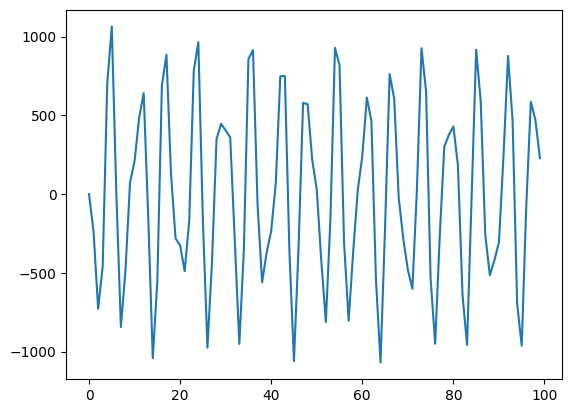

In [4]:
plt.plot(loads_surface)

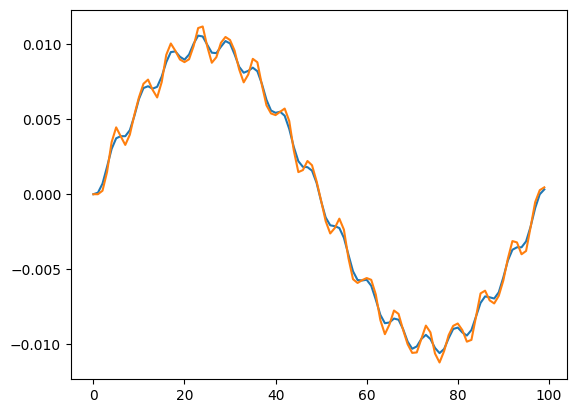

In [14]:
fig, ax= plt.subplots()
ax.plot(u_sol[0,:])
ax.plot(u_sol[-1,:])
plt.show()

(200, 100)

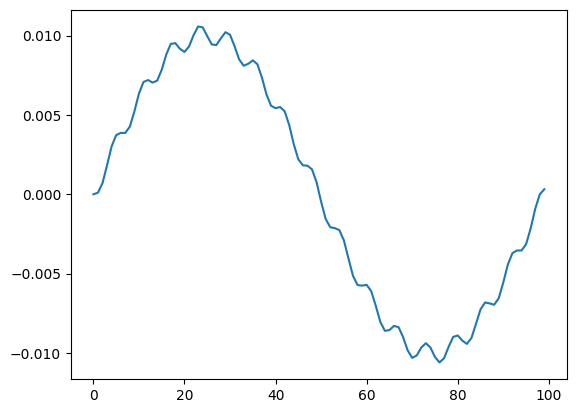

In [15]:
plt.plot(u_sol[0,:])
u_sol.shape

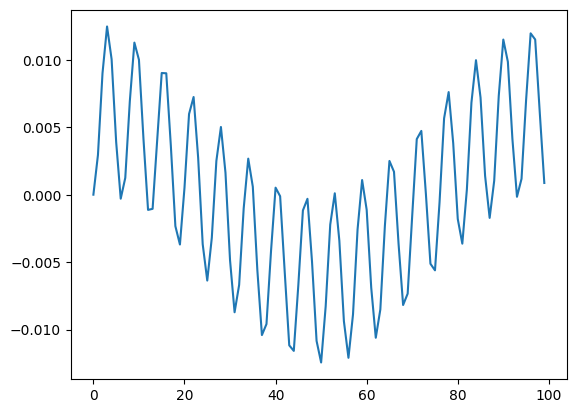

In [18]:
plt.plot(v_sol[0,:])

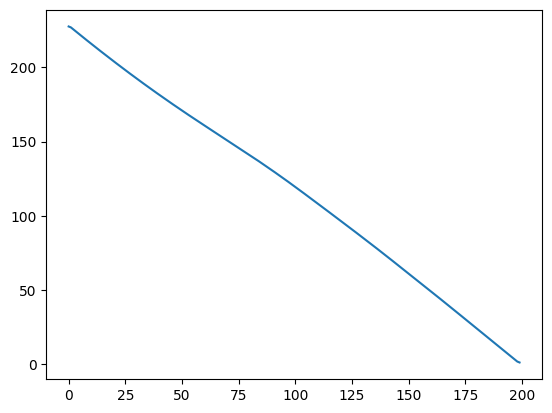

In [17]:
plt.plot(np.gradient( E * A *u_sol.T[-1,:],dx))

In [15]:
import numpy as np
from scipy.integrate import solve_ivp
def exponential_decay(t, y):
  return -0.5 * y
sol = solve_ivp(exponential_decay, [0, 10], [2, 4, 8])
print(sol.t)

[ 0.          0.11487653  1.26364188  3.06061781  4.81611105  6.57445806
  8.33328988 10.        ]


In [7]:
import numpy as np
T=10
def polished_rod_displacement(t):
    A_p = 0.1  # amplitude (m)
    omega = 2 * np.pi / T  # angular frequency
    return A_p * np.sin(omega * t)

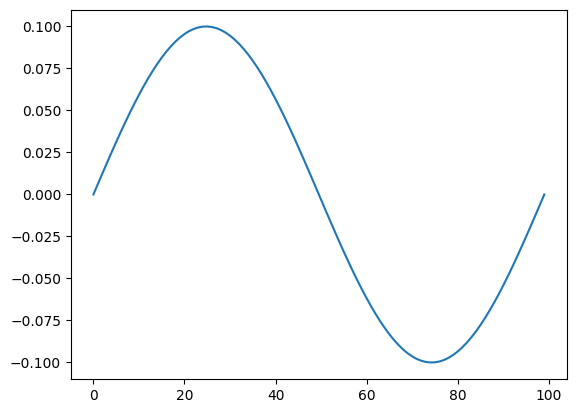

In [10]:
t=np.linspace(0,10,100)
import matplotlib.pyplot as plt
plt.plot(polished_rod_displacement(t))

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
L = 2000  # length of sucker rod (m)
rho_rod = 7850  # density of the rod (kg/m^3)
E = 2.1e11  # Young's modulus (Pa)
A = 0.002  # cross-sectional area (m^2)
g = 9.81  # acceleration due to gravity (m/s^2)
fluid_density = 1000  # density of fluid (kg/m^3)
friction_coefficient_rod_tubing = 0.1
friction_coefficient_fluid_rod = 0.05
c = np.sqrt(E / rho_rod)  # wave speed
damping_coefficient = 0.05  # damping coefficient (arbitrary units)
compressibility_factor = 0.0001  # compressibility factor for the fluid
temperature_gradient = 0.01  # temperature gradient (°C/m)
thermal_expansion_coefficient = 1e-5  # thermal expansion coefficient

# Time parameters
T = 10  # total time (s)
dt = 0.01  # time step (s)
N_t = int(T / dt)  # number of time steps

# Spatial parameters
N_x = 100  # number of spatial steps
dx = L / N_x  # spatial step size
x = np.linspace(0, L, N_x)  # spatial domain

# Initial conditions
u = np.zeros(N_x)  # initial displacement
v = np.zeros(N_x)  # initial velocity

# Boundary conditions
def polished_rod_displacement(t):
    A_p = 1  # amplitude (m)
    omega = 2 * np.pi / T  # angular frequency
    return A_p * np.sin(omega * t)

# Temperature effects on Young's modulus
def temperature_effect(x):
    temperature = temperature_gradient * x
    return E * (1 - thermal_expansion_coefficient * temperature)

# Finite difference method for time integration
def finite_difference(t, y):
    u = y[:N_x]
    v = y[N_x:]
    dudt = v
    dvdt = np.zeros(N_x)

    # Interior points
    for i in range(1, N_x-1):
        E_temp = temperature_effect(x[i])
        c_temp = np.sqrt(E_temp / rho_rod)
        dvdt[i] = c_temp**2 * (u[i+1] - 2*u[i] + u[i-1]) / dx**2 - damping_coefficient * v[i]

    # Add rod weight, fluid load, and compressibility
    rod_weight = rho_rod * A * g
    fluid_load = fluid_density * g * A * L
    friction_rod_tubing = friction_coefficient_rod_tubing * rod_weight * np.sign(v[1:-1])
    friction_fluid_rod = friction_coefficient_fluid_rod * fluid_load * np.sign(v[1:-1])

    dvdt[1:-1] -= (rod_weight + fluid_load + friction_rod_tubing + friction_fluid_rod) / (rho_rod * A)
    dvdt[1:-1] -= compressibility_factor * u[1:-1]

    # Surface boundary condition (displacement driven by polished rod)
    dvdt[0] = (polished_rod_displacement(t) - u[0]) / dt**2 - damping_coefficient * v[0]

    # Free boundary condition at downhole end (no force or acceleration constraint)
    dvdt[-1] = c**2 * (u[-2] - u[-1]) / dx**2 - damping_coefficient * v[-1]

    return np.concatenate([dudt, dvdt])

# Solve the PDE using scipy's solve_ivp
y0 = np.concatenate([u, v])
sol = solve_ivp(finite_difference, [0, T], y0, t_eval=np.linspace(0, T, N_t))

# Extract displacement and velocity
u_sol = sol.y[:N_x, :]
v_sol = sol.y[N_x:, :]

# Calculate loads
def calculate_loads(displacement, velocity):
    # Load is influenced by weight, fluid load, dynamic stress, and compressibility
    strain = np.gradient(displacement, dx)
    dynamic_stress = np.array([temperature_effect(xi) for xi in x]) * strain
    rod_weight = rho_rod * A * g
    fluid_load = fluid_density * g * A * L
    friction_rod_tubing = friction_coefficient_rod_tubing * rod_weight * np.sign(velocity)
    friction_fluid_rod = friction_coefficient_fluid_rod * fluid_load * np.sign(velocity)
    load = dynamic_stress + rod_weight + fluid_load + friction_rod_tubing + friction_fluid_rod + compressibility_factor * displacement
    return load

# Calculate loads for surface and downhole positions
loads_surface = calculate_loads(u_sol[0, :], v_sol[0, :])
loads_downhole = calculate_loads(u_sol[-1, :], v_sol[-1, :])

# Plot dynagraphs
time = sol.t
surface_displacement = polished_rod_displacement(time)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(surface_displacement, loads_surface, label='Surface Load')
plt.xlabel('Displacement (m)')
plt.ylabel('Load (N)')
plt.title('Surface Dynagraph')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(u_sol[-1, :], loads_downhole, label='Downhole Load')
plt.xlabel('Displacement (m)')
plt.ylabel('Load (N)')
plt.title('Downhole Dynagraph')
plt.legend()

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

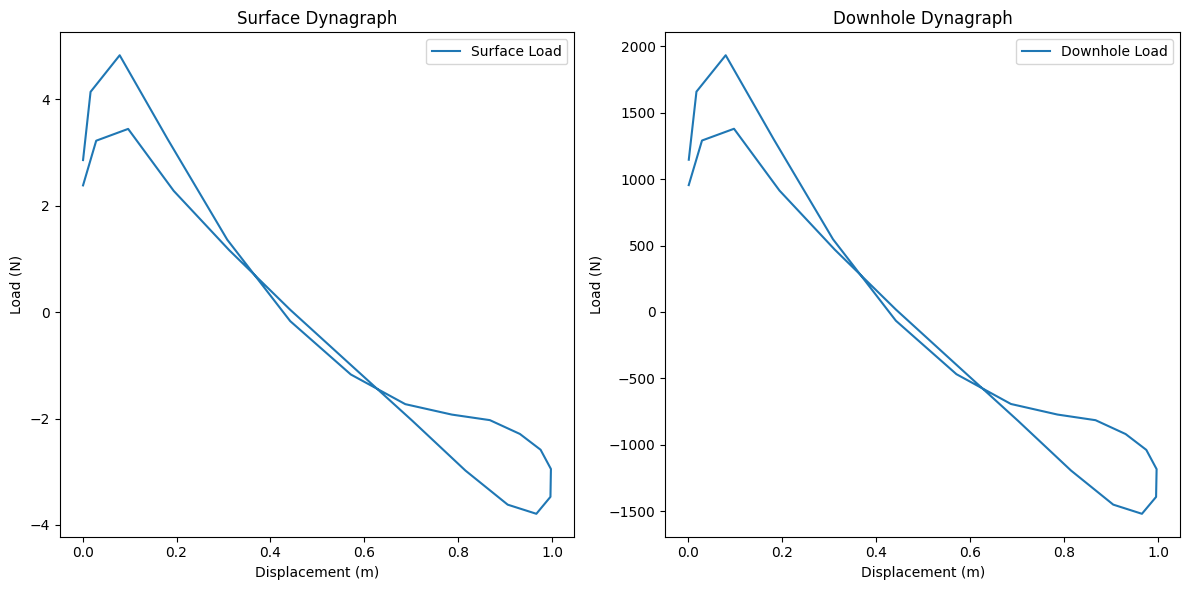

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
L = 500  # length of sucker rod (m)
rho = 7850  # density (kg/m^3)
E = 2.1e11  # Young's modulus (Pa)
A = 0.002  # cross-sectional area (m^2)
c = np.sqrt(E / rho)  # wave speed
damping_coefficient = 0.05  # damping coefficient (arbitrary units)

# Time parameters
T = 10  # total time (s)
N_t = 25  # number of time steps
dt = T/N_t  # time step (s)

# Spatial parameters
N_x = 200  # number of spatial steps
dx = L / N_x  # spatial step size
x = np.linspace(0, L, N_x)  # spatial domain

# Initial conditions
t_initial=np.linspace(0, T, N_t)
u = np.zeros(N_x)  # initial displacement
v = np.zeros(N_x)  # initial velocity

u= np.array([0.001, 0.017, 0.079, 0.181, 0.308, 0.442, 0.571, 0.687, 0.786, 0.867, 0.931, 0.975,
             0.997, 0.996, 0.966, 0.905, 0.815, 0.702, 0.575, 0.442, 0.312, 0.194, 0.097, 0.029, 0.001])

def get_derivatives(u):
    du_dt=np.gradient(u, dt, edge_order=1)
    #window_size = 100  # Choose an appropriate window size
    #du_dt= np.convolve(du_dt, np.ones(window_size)/window_size, mode='same')
    d2u_dt2=np.gradient(du_dt, dt, edge_order=1)
    #window_size= 100
    #d2u_dt2= np.convolve(d2u_dt2, np.ones(window_size)/window_size, mode='same')

    return du_dt, d2u_dt2

dudt, dvdt= get_derivatives(u)

u_sol=[u]

for i in range(N_x):
    dudt, dvdt= get_derivatives(u_sol[-1])
    if i==0:
        u_sol.append(dx**2/c**2*(dvdt+damping_coefficient*dudt)+u_sol[-1])
    else:
        u_sol.append(dx**2/c**2*(dvdt+damping_coefficient*dudt)+2*u_sol[-1] -u_sol[-2])

u_sol=np.array(u_sol)


# Calculate loads
def calculate_loads(displacement):
    # Load is proportional to strain
    strain = np.gradient(displacement, dx, edge_order=2)
    load = E * A * strain
    return load

# Calculate loads for surface and downhole positions
#loads_surface = calculate_loads(u_sol[0, :])
#loads_downhole = calculate_loads(u_sol[-1, :])

loads_surface=[]
loads_downhole=[]
for i in range(N_t):
    loads_surface.append(calculate_loads(u_sol.T[i,:])[0])
    loads_downhole.append(calculate_loads(u_sol.T[i,:])[-1])
loads_surface=np.array(loads_surface)
loads_downhole=np.array(loads_downhole)

# Plot dynagraphs
surface_displacement = u

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(surface_displacement, loads_surface, label='Surface Load')
plt.xlabel('Displacement (m)')
plt.ylabel('Load (N)')
plt.title('Surface Dynagraph')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(u_sol[-1, :], loads_downhole, label='Downhole Load')
plt.xlabel('Displacement (m)')
plt.ylabel('Load (N)')
plt.title('Downhole Dynagraph')
plt.legend()

plt.tight_layout()
plt.show()


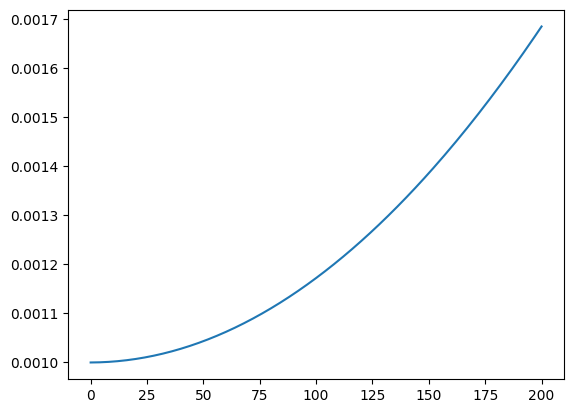

In [31]:
plt.plot(u_sol.T[0,:])